In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Body Measures

In [2]:
# Body Measures (BMX_J)
bmx_data = pd.read_sas('BMX_J.XPT')
bmx_data
bmx_data[bmx_data['BMDSTATS']==1].isnull().sum()

SEQN           0
BMDSTATS       0
BMXWT          0
BMIWT       7946
BMXRECUM    7210
BMIRECUM    8019
BMXHEAD     7825
BMIHEAD     8019
BMXHT        525
BMIHT       7981
BMXBMI       525
BMXLEG      1396
BMILEG      8019
BMXARML       65
BMIARML     8019
BMXARMC       65
BMIARMC     8019
BMXWAIST     525
BMIWAIST    8019
BMXHIP      2088
BMIHIP      8019
dtype: int64

In [3]:
bmx_data = bmx_data[bmx_data['BMDSTATS']==1]
filtered_columns = bmx_data.columns[bmx_data.isnull().sum() <= 525]
filtered_bmx_data = bmx_data[filtered_columns]
filtered_bmx_data.drop(['BMDSTATS', 'BMXARML', 'BMXARMC'], axis=1, inplace=True)
filtered_bmx_data.head()

<ipython-input-3-80b3917bb46d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bmx_data.drop(['BMDSTATS', 'BMXARML', 'BMXARMC'], axis=1, inplace=True)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST
0,93703.0,13.7,88.6,17.5,48.2
1,93704.0,13.9,94.2,15.7,50.0
2,93705.0,79.5,158.3,31.7,101.8
3,93706.0,66.3,175.7,21.5,79.3
4,93707.0,45.4,158.4,18.1,64.1


## Blood Pressure

In [4]:
bpx_data = pd.read_sas('BPXO_J.XPT')
bpx_data


,SEQN,BPAOARM,BPAOCSZ,BPAOMNTS,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,93705.0,b'R',4.0,-20.0,164.0,66.0,165.0,66.0,172.0,66.0,52.0,51.0,49.0
1,93706.0,b'R',3.0,138.0,126.0,74.0,128.0,68.0,133.0,71.0,76.0,83.0,73.0
2,93707.0,b'R',2.0,12.0,136.0,71.0,133.0,72.0,139.0,71.0,100.0,89.0,91.0
3,93708.0,b'R',3.0,22.0,146.0,82.0,142.0,76.0,151.0,81.0,67.0,65.0,71.0
4,93709.0,b'R',4.0,58.0,120.0,83.0,124.0,81.0,113.0,74.0,64.0,62.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,102952.0,b'R',3.0,97.0,154.0,92.0,144.0,84.0,145.0,69.0,88.0,84.0,74.0
7128,102953.0,b'R',4.0,-57.0,135.0,91.0,133.0,86.0,132.0,83.0,76.0,79.0,78.0
7129,102954.0,b'',3.0,-101.0,123.0,75.0,119.0,71.0,122.0,73.0,NaN,NaN,NaN
7130,102955.0,b'R',5.0,-88.0,92.0,64.0,97.0,64.0,94.0,63.0,71.0,71.0,76.0


In [5]:
bpx_data['SYSTOLIC_AVG'] = bpx_data[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1)
bpx_data['DIASTOLIC_AVG'] = bpx_data[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1)


def blood_pressure_category(row):
    if row['SYSTOLIC_AVG'] < 90 or row['DIASTOLIC_AVG'] < 60:
        return 'Low'
    elif row['SYSTOLIC_AVG'] >= 140 or row['DIASTOLIC_AVG'] >= 90:
        return 'High'
    else:
        return 'Normal'


bpx_data['BP_CATEGORY'] = bpx_data.apply(blood_pressure_category, axis=1)
filtered_bpx_data = bpx_data[['SEQN', 'BP_CATEGORY']]
filtered_bpx_data.head()

,SEQN,BP_CATEGORY
0,93705.0,High
1,93706.0,Normal
2,93707.0,Normal
3,93708.0,High
4,93709.0,Normal


## Demographic Variables and Sample Weights

In [6]:
demoj_data = pd.read_sas('DEMO_J.XPT')
demoj_data.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    8657
RIDRETH1       0
RIDRETH3       0
RIDEXMON     550
RIDEXAGM    5821
DMQMILIZ    3250
DMQADFC     8693
DMDBORN4       0
DMDCITZN       3
DMDYRSUS    7306
DMDEDUC3    6948
DMDEDUC2    3685
DMDMARTL    3685
RIDEXPRG    8144
SIALANG        0
SIAPROXY       0
SIAINTRP       0
FIALANG      474
FIAPROXY     474
FIAINTRP     474
MIALANG     2570
MIAPROXY    2570
MIAINTRP    2570
AIALANGA    4277
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGZ       0
DMDHREDZ     490
DMDHRMAZ     191
DMDHSEDZ    4503
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     491
INDFMIN2     474
INDFMPIR    1231
dtype: int64

In [7]:
demoj_data.columns[demoj_data.isnull().sum() <= 500]

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'DMDBORN4', 'DMDCITZN', 'SIALANG', 'SIAPROXY', 'SIAINTRP',
       'FIALANG', 'FIAPROXY', 'FIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA',
       'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ',
       'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2'],
      dtype='object')

In [8]:
keep =[
    "SEQN",     # 受访者序列号
    "RIAGENDR", # 性别
    "RIDAGEYR", # 筛查时的年龄（以年计）
    "RIDRETH1", # 种族/西班牙裔起源
    "DMDHHSIZ", # 家庭中的总人数
    "DMDHREDZ", # 家庭参考人的教育水平
    "DMDHRMAZ", # 家庭参考人的婚姻状况
    "INDHHIN2"  # 年家庭收入
]
# demoj_data.columns[demoj_data.isnull().sum() <= 500]
filtered_demoj_data = demoj_data[keep]
filtered_demoj_data.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
0,93703.0,2.0,2.0,5.0,5.0,3.0,1.0,15.0
1,93704.0,1.0,2.0,3.0,4.0,3.0,1.0,15.0
2,93705.0,2.0,66.0,4.0,1.0,1.0,2.0,3.0
3,93706.0,1.0,18.0,5.0,5.0,3.0,1.0,NaN
4,93707.0,1.0,13.0,5.0,7.0,2.0,1.0,10.0


In [9]:
merged_data = pd.merge(filtered_bpx_data, filtered_bmx_data, on='SEQN', how='inner')
merged_data

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST
0,93705.0,High,79.5,158.3,31.7,101.8
1,93706.0,Normal,66.3,175.7,21.5,79.3
2,93707.0,Normal,45.4,158.4,18.1,64.1
3,93708.0,High,53.5,150.2,23.7,88.2
4,93709.0,Normal,88.8,151.1,38.9,113.0
...,...,...,...,...,...,...
6618,102952.0,High,49.0,156.5,20.0,82.2
6619,102953.0,Normal,97.4,164.9,35.8,114.8
6620,102954.0,Normal,69.1,162.6,26.1,86.4
6621,102955.0,Normal,111.9,156.6,45.6,113.5


In [10]:
df = pd.merge(merged_data, filtered_demoj_data, on='SEQN', how='inner')
df

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
0,93705.0,High,79.5,158.3,31.7,101.8,2.0,66.0,4.0,1.0,1.0,2.0,3.0
1,93706.0,Normal,66.3,175.7,21.5,79.3,1.0,18.0,5.0,5.0,3.0,1.0,NaN
2,93707.0,Normal,45.4,158.4,18.1,64.1,1.0,13.0,5.0,7.0,2.0,1.0,10.0
3,93708.0,High,53.5,150.2,23.7,88.2,2.0,66.0,5.0,2.0,1.0,1.0,6.0
4,93709.0,Normal,88.8,151.1,38.9,113.0,2.0,75.0,4.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6618,102952.0,High,49.0,156.5,20.0,82.2,2.0,70.0,5.0,2.0,2.0,1.0,4.0
6619,102953.0,Normal,97.4,164.9,35.8,114.8,1.0,42.0,1.0,1.0,2.0,2.0,12.0
6620,102954.0,Normal,69.1,162.6,26.1,86.4,2.0,41.0,4.0,7.0,2.0,2.0,10.0
6621,102955.0,Normal,111.9,156.6,45.6,113.5,2.0,14.0,4.0,4.0,2.0,1.0,9.0


In [11]:
df.isnull().sum()

SEQN             0
BP_CATEGORY      0
BMXWT            0
BMXHT            0
BMXBMI           0
BMXWAIST         0
RIAGENDR         0
RIDAGEYR         0
RIDRETH1         0
DMDHHSIZ         0
DMDHREDZ       302
DMDHRMAZ       141
INDHHIN2       289
dtype: int64

## Data Detail
- SEQN: Respondent sequence number - 受访者序列号
- BP_CATEGORY: Blood pressure category - 血压类别
- BMXWT: Body weight - 体重
- BMXHT: Body height - 身高
- BMXBMI: Body mass index - 体质指数
- BMXWAIST: Waist circumference - 腰围
- RIAGENDR: Gender - 性别
- RIDAGEYR: Age in years - 年龄（以年计）
- RIDRETH1: Race/ethnicity - 种族/族裔
- DMDHHSIZ: Household size - 家庭户人数
- DMDHREDZ: Head of household's education level - 家庭户主的教育水平
- DMDHRMAZ: Head of household's marital status - 家庭户主的婚姻状况
- INDHHIN2: Household income - 家庭户收入

## Exploratory data analysis

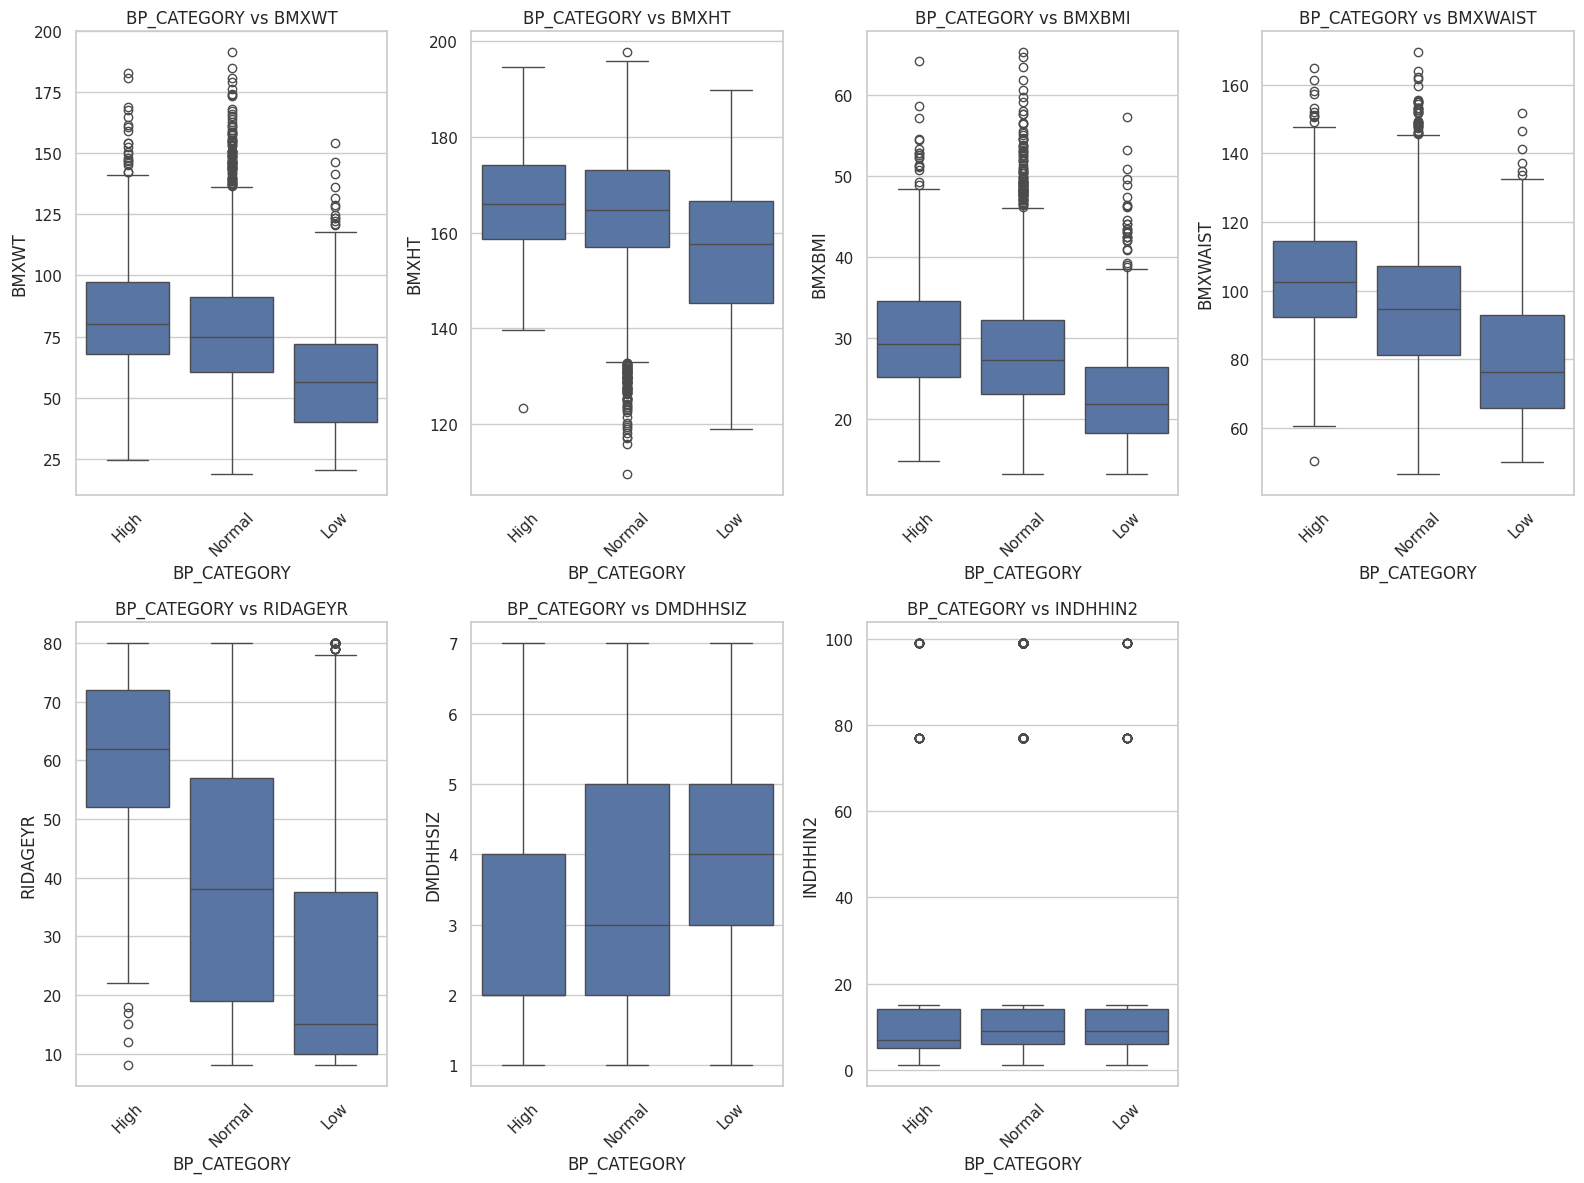

In [12]:
continuous_variables = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='BP_CATEGORY', y=var, data=df
)
    plt.title(f'BP_CATEGORY vs {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


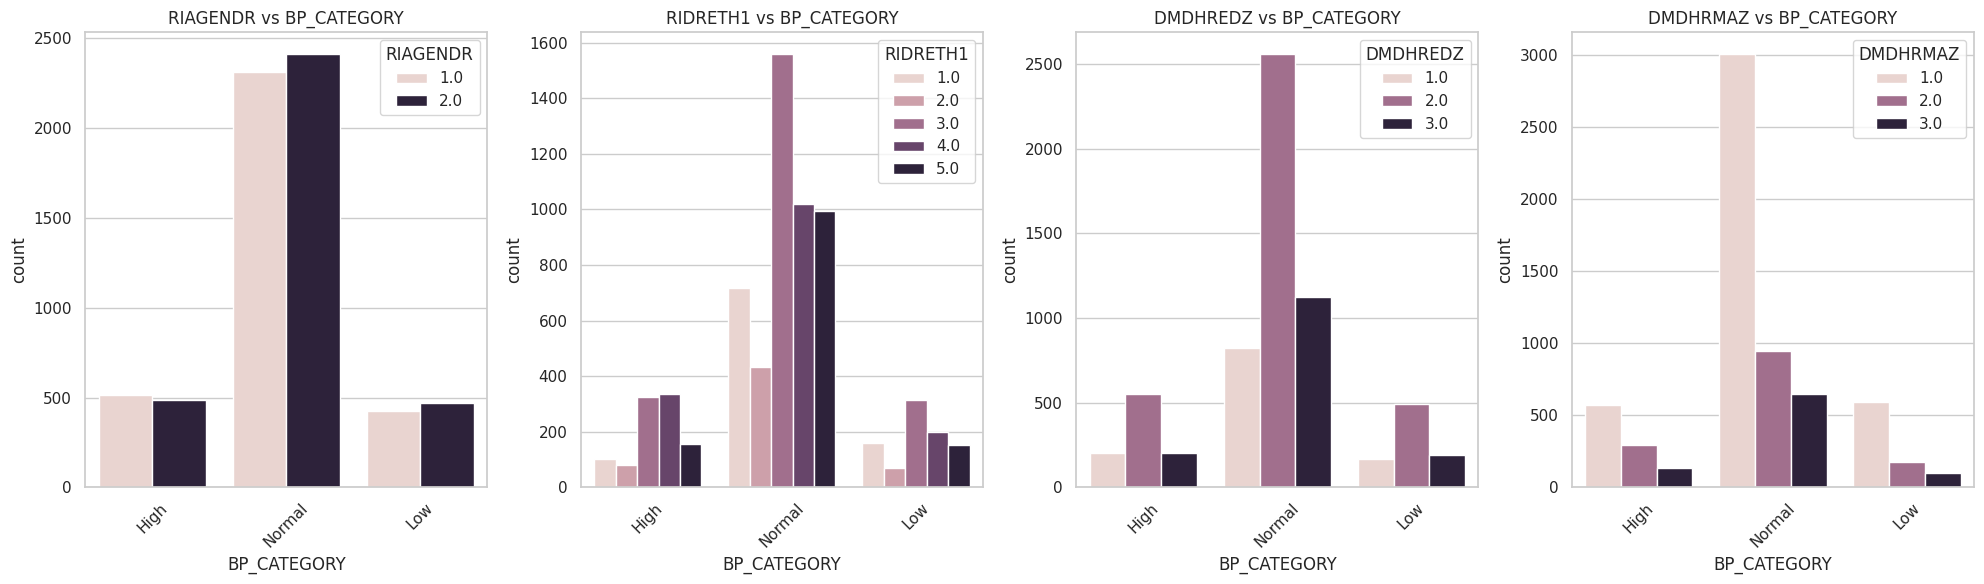

In [13]:
categorical_variables = ['RIAGENDR', 'RIDRETH1', 'DMDHREDZ', 'DMDHRMAZ']
plt.figure(figsize=(20, 6))

for i, cat_var in enumerate(categorical_variables, 1):
    plt.subplot(1, 4, i)
    sns.countplot(hue=cat_var, x='BP_CATEGORY', data=df)
    plt.title(f'{cat_var} vs BP_CATEGORY')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Univariate statistical analysis

In [14]:
df

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
0,93705.0,High,79.5,158.3,31.7,101.8,2.0,66.0,4.0,1.0,1.0,2.0,3.0
1,93706.0,Normal,66.3,175.7,21.5,79.3,1.0,18.0,5.0,5.0,3.0,1.0,NaN
2,93707.0,Normal,45.4,158.4,18.1,64.1,1.0,13.0,5.0,7.0,2.0,1.0,10.0
3,93708.0,High,53.5,150.2,23.7,88.2,2.0,66.0,5.0,2.0,1.0,1.0,6.0
4,93709.0,Normal,88.8,151.1,38.9,113.0,2.0,75.0,4.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6618,102952.0,High,49.0,156.5,20.0,82.2,2.0,70.0,5.0,2.0,2.0,1.0,4.0
6619,102953.0,Normal,97.4,164.9,35.8,114.8,1.0,42.0,1.0,1.0,2.0,2.0,12.0
6620,102954.0,Normal,69.1,162.6,26.1,86.4,2.0,41.0,4.0,7.0,2.0,2.0,10.0
6621,102955.0,Normal,111.9,156.6,45.6,113.5,2.0,14.0,4.0,4.0,2.0,1.0,9.0


In [15]:
from scipy.stats import chi2_contingency, f_oneway

# Define the list of categorical features and continuous features
categorical_features = ['RIAGENDR', 'RIDRETH1', 'DMDHREDZ', 'DMDHRMAZ']
continuous_features = [col for col in df.columns if col not in categorical_features + ['BP_CATEGORY']]

# Define the target variable
target_variable = 'BP_CATEGORY'

# Initialize lists to store results
feature_names = []
test_types = []
test_values = []
p_values = []

# Perform chi-square tests for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    feature_names.append(feature)
    test_types.append('Chi-square')
    test_values.append(chi2)
    p_values.append(p_value)

# Perform ANOVA tests for each continuous feature
for feature in continuous_features:
    grouped_data = [group[1][feature] for group in df.groupby(target_variable)]
    f_statistic, p_value = f_oneway(*grouped_data)
    feature_names.append(feature)
    test_types.append('ANOVA')
    test_values.append(f_statistic)
    p_values.append(p_value)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Test Type': test_types,
    'Test Value': test_values,
    'P-value': p_values
})
results_df_sorted = results_df.sort_values(by='P-value')
results_df_sorted['Significance'] = results_df_sorted['P-value'] < 0.05
results_df_sorted

,Feature,Test Type,Test Value,P-value,Significance
9,RIDAGEYR,ANOVA,632.531267,4.120266e-252,True
8,BMXWAIST,ANOVA,382.601341,5.758896e-158,True
5,BMXWT,ANOVA,313.642177,7.239302e-131,True
7,BMXBMI,ANOVA,249.868548,2.422406e-105,True
6,BMXHT,ANOVA,199.436487,7.850700e-85,True
10,DMDHHSIZ,ANOVA,179.328741,1.428931e-76,True
1,RIDRETH1,Chi-square,90.437064,3.791024e-16,True
3,DMDHRMAZ,Chi-square,42.049374,1.629312e-08,True
2,DMDHREDZ,Chi-square,10.687616,3.030845e-02,True
0,RIAGENDR,Chi-square,2.848790,2.406540e-01,False


### Colinear

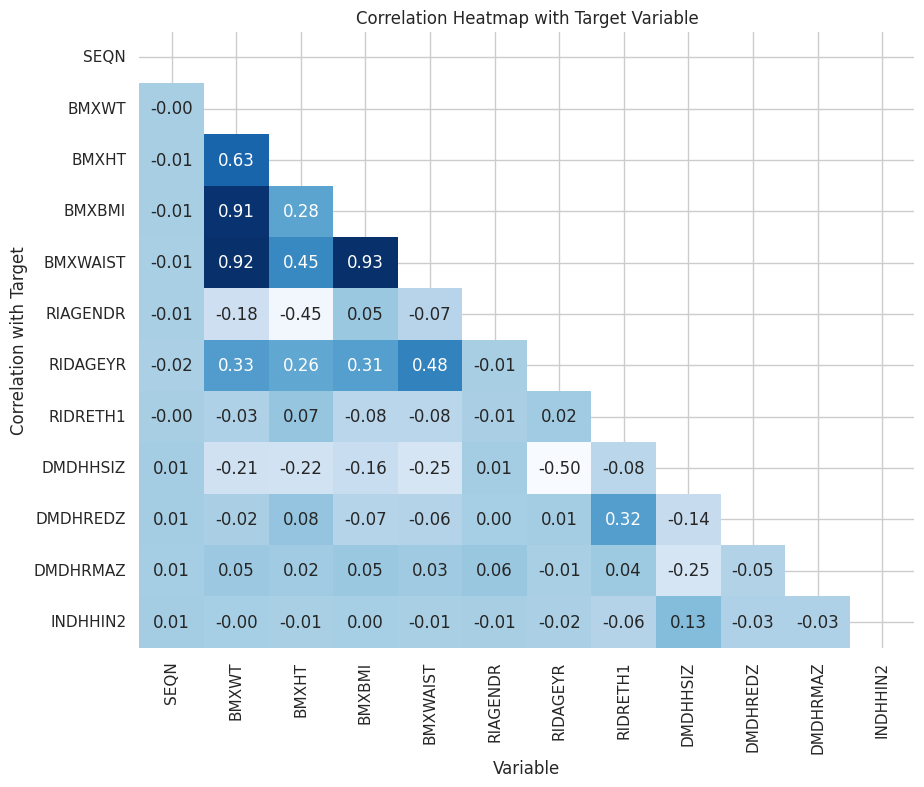

In [16]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", cbar=False,
      mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)))
plt.title("Correlation Heatmap with Target Variable")
plt.xlabel("Variable")
plt.ylabel("Correlation with Target")
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data
df_numeric.dropna(inplace=True)
calculate_vif(df_numeric)

,Feature,VIF
0,SEQN,746.032595
1,BMXWT,343.536236
2,BMXHT,810.931515
3,BMXBMI,408.825467
4,BMXWAIST,341.317248
5,RIAGENDR,15.022602
6,RIDAGEYR,9.082215
7,RIDRETH1,8.526358
8,DMDHHSIZ,8.242013
9,DMDHREDZ,12.568961


## Data Preprocess

### Process Missing Value

In [18]:
pd.DataFrame(df.isnull().sum()).rename(columns={0: 'Missing_Values'}).transpose()

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
Missing_Values,0,0,0,0,0,0,0,0,0,0,302,141,289


In [19]:
df_fillna = df.copy()
for column in ['DMDHREDZ', 'DMDHRMAZ']:
    mode = df_fillna[column].mode()[0]
    df_fillna[column] = df_fillna[column].fillna(mode)
median_value = df_fillna['INDHHIN2'].median()
df_fillna['INDHHIN2'] = df_fillna['INDHHIN2'].fillna(median_value)
pd.DataFrame(df_fillna.isnull().sum()).rename(columns={0: 'Missing_Values'}).transpose()

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
Missing_Values,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split Data into Training and Test Datasets

In [20]:
from sklearn.model_selection import train_test_split
# Train Dataset（80%）, Test Dataset（20%）
df_train, df_test = train_test_split(df_fillna, test_size=0.1, random_state=12)

In [21]:
df_train.head()

,SEQN,BP_CATEGORY,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
783,94771.0,Normal,69.3,164.9,25.5,86.3,2.0,42.0,3.0,7.0,2.0,1.0,15.0
3179,98147.0,Normal,99.9,186.1,28.8,100.2,1.0,29.0,3.0,3.0,3.0,1.0,6.0
5321,101138.0,Normal,118.0,171.4,40.2,121.4,2.0,33.0,3.0,2.0,2.0,1.0,15.0
2139,96638.0,Normal,79.8,175.3,26.0,96.5,1.0,58.0,3.0,3.0,2.0,1.0,14.0
4535,100016.0,Normal,82.8,167.4,29.5,100.6,1.0,36.0,5.0,3.0,3.0,1.0,10.0


## Model Training

### Prepare

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.decomposition import PCA

X_train = df_train.drop(columns=['SEQN', 'RIAGENDR', 'BP_CATEGORY'])
y_train = df_train['BP_CATEGORY']
X_test = df_test.drop(columns=['SEQN', 'RIAGENDR', 'BP_CATEGORY'])
y_test = df_test['BP_CATEGORY']


categorical_features = [
            #  'RIAGENDR',
             'RIDRETH1',
             'DMDHREDZ',
             'DMDHRMAZ'
             ]
continuous_features = [col for col in X_train.columns if col not in categorical_features + ['BP_CATEGORY', 'SEQN']]

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough'
# )

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('pca', PCA(), continuous_features)
    ],
    remainder='passthrough'
)


preprocessor.fit(X_train)
# new_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
# all_feature_names = list(new_feature_names) + list(X_train.drop(columns=categorical_features).columns)
# X_train_processed = preprocessor.transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['RIDRETH1', 'DMDHREDZ', 'DMDHRMAZ']),
                                ('pca', PCA(),
                                 ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST',
                                  'RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2'])])

In [37]:
X_train

,BMXWT,BMXHT,BMXBMI,BMXWAIST,RIDAGEYR,RIDRETH1,DMDHHSIZ,DMDHREDZ,DMDHRMAZ,INDHHIN2
783,69.3,164.9,25.5,86.3,42.0,3.0,7.0,2.0,1.0,15.0
3179,99.9,186.1,28.8,100.2,29.0,3.0,3.0,3.0,1.0,6.0
5321,118.0,171.4,40.2,121.4,33.0,3.0,2.0,2.0,1.0,15.0
2139,79.8,175.3,26.0,96.5,58.0,3.0,3.0,2.0,1.0,14.0
4535,82.8,167.4,29.5,100.6,36.0,5.0,3.0,3.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...
3714,85.7,183.5,25.5,96.3,35.0,5.0,7.0,3.0,1.0,12.0
3325,59.0,174.0,19.5,70.0,21.0,4.0,5.0,2.0,3.0,6.0
1414,99.0,161.9,37.8,102.2,13.0,1.0,5.0,2.0,1.0,14.0
5787,89.9,183.1,26.8,101.4,38.0,5.0,3.0,2.0,1.0,14.0


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### No-Confounders

### Random Forest

In [53]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train_encoded)
# y_pred_rf = rf.predict(X_test)
# print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred_rf):.2f}')
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline_rf.set_params(classifier__random_state=42)


scores_rf = cross_validate(pipeline_rf, X_train, y_train_encoded, cv=5,
                        scoring={'accuracy': 'accuracy'})
mean_accuracy_rf = scores_rf['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_rf:.4f}')

pipeline_rf.fit(X_train, y_train_encoded)
y_pred_rf = pipeline_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f'Accuracy on test set: {test_accuracy_rf:.4f}')

conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
TP_rf = conf_matrix_rf[1, 1]
FN_rf = conf_matrix_rf[1, 0]
recall_rf = TP_rf / (TP_rf + FN_rf)
miss_rate_rf = FN_rf / (TP_rf + FN_rf)

print(f'Recall: {recall_rf:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_rf:.2f}')

Mean Accuracy of 5-fold CV: 0.7112
Accuracy on test set: 0.7119
Recall: 0.70
Miss Rate (Proportion of Type II Errors): 0.30


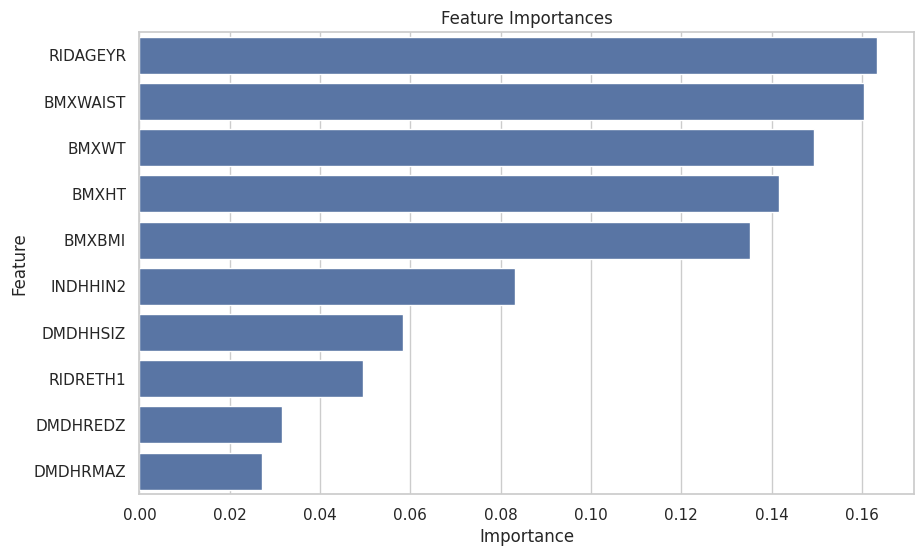

In [26]:
# feature_importances = rf.feature_importances_
# indices = np.argsort(feature_importances)[::-1]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances[indices], y=X_train.columns[indices])
# plt.title("Feature Importances")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.show()


### XGBoost

In [73]:
from xgboost import XGBClassifier

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])
pipeline_xgb.set_params(classifier__random_state=42)

scores_xgb = cross_validate(pipeline_xgb, X_train, y_train_encoded, cv=5,
                            scoring={'accuracy': 'accuracy'})
mean_accuracy_xgb = scores_xgb['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_xgb:.4f}')


pipeline_xgb.fit(X_train, y_train_encoded)
y_pred_xgb = pipeline_xgb.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'Accuracy on test set: {test_accuracy_xgb:.4f}')


conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
TP_xgb = conf_matrix_xgb[1, 1]
FN_xgb = conf_matrix_xgb[1, 0]
recall_xgb = TP_xgb / (TP_xgb + FN_xgb)
miss_rate_xgb = FN_xgb / (TP_xgb + FN_xgb)

print(f'Recall: {recall_xgb:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_xgb:.2f}')

Mean Accuracy of 5-fold CV: 0.6961
Accuracy on test set: 0.6998
Recall: 0.74
Miss Rate (Proportion of Type II Errors): 0.26


### SVM

In [56]:
from sklearn.svm import SVC

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Enable probability estimates
])
pipeline_svc.set_params(classifier__random_state=42)


scores_svc = cross_validate(pipeline_svc, X_train, y_train_encoded, cv=5,
                            scoring={'accuracy': 'accuracy'})
mean_accuracy_svc = scores_svc['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_svc:.4f}')


pipeline_svc.fit(X_train, y_train_encoded)
y_pred_svc = pipeline_svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test_encoded, y_pred_svc)
print(f'Accuracy on test set: {test_accuracy_svc:.4f}')


conf_matrix_svc = confusion_matrix(y_test_encoded, y_pred_svc)
TP_svc = conf_matrix_svc[1, 1]
FN_svc = conf_matrix_svc[1, 0]
recall_svc = TP_svc / (TP_svc + FN_svc)
miss_rate_svc = FN_svc / (TP_svc + FN_svc)

print(f'Recall: {recall_svc:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_svc:.2f}')

Mean Accuracy of 5-fold CV: 0.7116
Accuracy on test set: 0.7360
Recall: 1.00
Miss Rate (Proportion of Type II Errors): 0.00


## LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline_lda = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

scores_lda = cross_validate(pipeline_lda, X_train, y_train_encoded, cv=5,
                            scoring={'accuracy': 'accuracy'})
mean_accuracy_lda = scores_lda['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_lda:.4f}')


pipeline_lda.fit(X_train, y_train_encoded)
y_pred_lda = pipeline_lda.predict(X_test)
test_accuracy_lda = accuracy_score(y_test_encoded, y_pred_lda)
print(f'Accuracy on test set: {test_accuracy_lda:.4f}')


conf_matrix_lda = confusion_matrix(y_test_encoded, y_pred_lda)
TP_lda = conf_matrix_lda[1, 1]
FN_lda = conf_matrix_lda[1, 0]
recall_lda = TP_lda / (TP_lda + FN_lda)
miss_rate_lda = FN_lda / (TP_lda + FN_lda)

print(f'Recall: {recall_lda:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_lda:.2f}')

Mean Accuracy of 5-fold CV: 0.7077
Accuracy on test set: 0.7270
Recall: 0.71
Miss Rate (Proportion of Type II Errors): 0.29


## QDA

In [63]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

pipeline_qda = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', QuadraticDiscriminantAnalysis())
])

scores_qda = cross_validate(pipeline_qda, X_train, y_train_encoded, cv=5,
                            scoring={'accuracy': 'accuracy'})
mean_accuracy_qda = scores_qda['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_qda:.4f}')

pipeline_qda.fit(X_train, y_train_encoded)
y_pred_qda = pipeline_qda.predict(X_test)
test_accuracy_qda = accuracy_score(y_test_encoded, y_pred_qda)
print(f'Accuracy on test set: {test_accuracy_qda:.4f}')

conf_matrix_qda = confusion_matrix(y_test_encoded, y_pred_qda)
TP_qda = conf_matrix_qda[1, 1]
FN_qda = conf_matrix_qda[1, 0]
recall_qda = TP_qda / (TP_qda + FN_qda)
miss_rate_qda = FN_qda / (TP_qda + FN_qda)

print(f'Recall: {recall_qda:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_qda:.2f}')

Mean Accuracy of 5-fold CV: 0.6455
Accuracy on test set: 0.5098
Recall: 0.05
Miss Rate (Proportion of Type II Errors): 0.95


### Logistic

In [64]:
from sklearn.linear_model import LogisticRegression

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipeline_logistic.set_params(classifier__random_state=42, classifier__solver='liblinear')


scores_logistic = cross_validate(pipeline_logistic, X_train, y_train_encoded, cv=5,
                            scoring={'accuracy': 'accuracy'})
mean_accuracy_logistic = scores_logistic['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_logistic:.4f}')


pipeline_logistic.fit(X_train, y_train_encoded)
y_pred_logistic = pipeline_logistic.predict(X_test)
test_accuracy_logistic = accuracy_score(y_test_encoded, y_pred_logistic)
print(f'Accuracy on test set: {test_accuracy_logistic:.4f}')

conf_matrix_logistic = confusion_matrix(y_test_encoded, y_pred_logistic)
TP_logistic = conf_matrix_logistic[1, 1]
FN_logistic = conf_matrix_logistic[1, 0]
recall_logistic = TP_logistic / (TP_logistic + FN_logistic)
miss_rate_logistic = FN_logistic / (TP_logistic + FN_logistic)

print(f'Recall: {recall_logistic:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_logistic:.2f}')

Mean Accuracy of 5-fold CV: 0.7114
Accuracy on test set: 0.7345
Recall: 0.55
Miss Rate (Proportion of Type II Errors): 0.45


### Confonders

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

### Random Forest

In [67]:
pipeline_rf_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', RandomForestClassifier())
])
pipeline_rf_con.set_params(classifier__random_state=42)


scores_rf_con = cross_validate(pipeline_rf_con, X_train, y_train_encoded, cv=5,
                               scoring={'accuracy': 'accuracy'})
mean_accuracy_rf_con = scores_rf_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_rf_con:.4f}')

pipeline_rf_con.fit(X_train, y_train_encoded)
y_pred_rf_con = pipeline_rf_con.predict(X_test)
test_accuracy_rf_con = accuracy_score(y_test_encoded, y_pred_rf_con)
print(f'Accuracy on test set: {test_accuracy_rf_con:.4f}')

# Calculate confusion matrix
conf_matrix_rf_con = confusion_matrix(y_test_encoded, y_pred_rf_con)
TP_rf_con = conf_matrix_rf_con[1, 1]
FN_rf_con = conf_matrix_rf_con[1, 0]
recall_rf_con = TP_rf_con / (TP_rf_con + FN_rf_con)
miss_rate_rf_con = FN_rf_con / (TP_rf_con + FN_rf_con)

print(f'Recall: {recall_rf_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_rf_con:.2f}')

Mean Accuracy of 5-fold CV: 0.7037
Accuracy on test set: 0.7059
Recall: 0.80
Miss Rate (Proportion of Type II Errors): 0.20


### XGBoost

In [74]:
pipeline_xgb_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', XGBClassifier())
])
pipeline_xgb_con.set_params(classifier__random_state=42, classifier__use_label_encoder=False, classifier__eval_metric='logloss')

scores_xgb_con = cross_validate(pipeline_xgb_con, X_train, y_train_encoded, cv=5, scoring={'accuracy': 'accuracy'})
mean_accuracy_xgb_con = scores_xgb_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_xgb_con:.4f}')

pipeline_xgb_con.fit(X_train, y_train_encoded)
y_pred_xgb_con = pipeline_xgb_con.predict(X_test)
test_accuracy_xgb_con = accuracy_score(y_test_encoded, y_pred_xgb_con)
print(f'Accuracy on test set: {test_accuracy_xgb_con:.4f}')

conf_matrix_xgb_con = confusion_matrix(y_test_encoded, y_pred_xgb_con)
TP_xgb_con = conf_matrix_xgb_con[1, 1]
FN_xgb_con = conf_matrix_xgb_con[1, 0]
recall_xgb_con = TP_xgb_con / (TP_xgb_con + FN_xgb_con)
miss_rate_xgb_con = FN_xgb_con / (TP_xgb_con + FN_xgb_con)
print(f'Recall: {recall_xgb_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_xgb_con:.2f}')

Mean Accuracy of 5-fold CV: 0.6901
Accuracy on test set: 0.7014
Recall: 0.80
Miss Rate (Proportion of Type II Errors): 0.20


### SVM

In [75]:
pipeline_svc_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', SVC(probability=True))
])
pipeline_svc_con.set_params(classifier__random_state=42)

scores_svc_con = cross_validate(pipeline_svc_con, X_train, y_train_encoded, cv=5, scoring={'accuracy': 'accuracy'})
mean_accuracy_svc_con = scores_svc_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_svc_con:.4f}')

pipeline_svc_con.fit(X_train, y_train_encoded)
y_pred_svc_con = pipeline_svc_con.predict(X_test)
test_accuracy_svc_con = accuracy_score(y_test_encoded, y_pred_svc_con)
print(f'Accuracy on test set: {test_accuracy_svc_con:.4f}')

conf_matrix_svc_con = confusion_matrix(y_test_encoded, y_pred_svc_con)
TP_svc_con = conf_matrix_svc_con[1, 1]
FN_svc_con = conf_matrix_svc_con[1, 0]
recall_svc_con = TP_svc_con / (TP_svc_con + FN_svc_con)
miss_rate_svc_con = FN_svc_con / (TP_svc_con + FN_svc_con)
print(f'Recall: {recall_svc_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_svc_con:.2f}')

Mean Accuracy of 5-fold CV: 0.7106
Accuracy on test set: 0.7330
Recall: 1.00
Miss Rate (Proportion of Type II Errors): 0.00


### LDA

In [77]:
pipeline_lda_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', LinearDiscriminantAnalysis())
])

scores_lda_con = cross_validate(pipeline_lda_con, X_train, y_train_encoded, cv=5, scoring={'accuracy': 'accuracy'})
mean_accuracy_lda_con = scores_lda_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_lda_con:.4f}')

pipeline_lda_con.fit(X_train, y_train_encoded)
y_pred_lda_con = pipeline_lda_con.predict(X_test)
test_accuracy_lda_con = accuracy_score(y_test_encoded, y_pred_lda_con)
print(f'Accuracy on test set: {test_accuracy_lda_con:.4f}')

conf_matrix_lda_con = confusion_matrix(y_test_encoded, y_pred_lda_con)
TP_lda_con = conf_matrix_lda_con[1, 1]
FN_lda_con = conf_matrix_lda_con[1, 0]
recall_lda_con = TP_lda_con / (TP_lda_con + FN_lda_con)
miss_rate_lda_con = FN_lda_con / (TP_lda_con + FN_lda_con)
print(f'Recall: {recall_lda_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_lda_con:.2f}')

Mean Accuracy of 5-fold CV: 0.7022
Accuracy on test set: 0.7119
Recall: 0.74
Miss Rate (Proportion of Type II Errors): 0.26


### QDA

In [71]:
pipeline_qda_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', QuadraticDiscriminantAnalysis())
])

scores_qda_con = cross_validate(pipeline_qda_con, X_train, y_train_encoded, cv=5, scoring={'accuracy': 'accuracy'})
mean_accuracy_qda_con = scores_qda_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_qda_con:.4f}')

pipeline_qda_con.fit(X_train, y_train_encoded)
y_pred_qda_con = pipeline_qda_con.predict(X_test)
test_accuracy_qda_con = accuracy_score(y_test_encoded, y_pred_qda_con)
print(f'Accuracy on test set: {test_accuracy_qda_con:.4f}')

conf_matrix_qda_con = confusion_matrix(y_test_encoded, y_pred_qda_con)
TP_qda_con = conf_matrix_qda_con[1, 1]
FN_qda_con = conf_matrix_qda_con[1, 0]
recall_qda_con = TP_qda_con / (TP_qda_con + FN_qda_con)
miss_rate_qda_con = FN_qda_con / (TP_qda_con + FN_qda_con)
print(f'Recall: {recall_qda_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_qda_con:.2f}')

Mean Accuracy of 5-fold CV: 0.5336
Accuracy on test set: 0.5068
Recall: 0.76
Miss Rate (Proportion of Type II Errors): 0.24


### Logistic

In [78]:
pipeline_logistic_con = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('classifier', LogisticRegression())
])
pipeline_logistic_con.set_params(classifier__random_state=42, classifier__solver='liblinear')

scores_logistic_con = cross_validate(pipeline_logistic_con, X_train, y_train_encoded, cv=5, scoring={'accuracy': 'accuracy'})
mean_accuracy_logistic_con = scores_logistic_con['test_accuracy'].mean()
print(f'Mean Accuracy of 5-fold CV: {mean_accuracy_logistic_con:.4f}')

pipeline_logistic_con.fit(X_train, y_train_encoded)
y_pred_logistic_con = pipeline_logistic_con.predict(X_test)
test_accuracy_logistic_con = accuracy_score(y_test_encoded, y_pred_logistic_con)
print(f'Accuracy on test set: {test_accuracy_logistic_con:.4f}')

conf_matrix_logistic_con = confusion_matrix(y_test_encoded, y_pred_logistic_con)
TP_logistic_con = conf_matrix_logistic_con[1, 1]
FN_logistic_con = conf_matrix_logistic_con[1, 0]
recall_logistic_con = TP_logistic_con / (TP_logistic_con + FN_logistic_con)
miss_rate_logistic_con = FN_logistic_con / (TP_logistic_con + FN_logistic_con)
print(f'Recall: {recall_logistic_con:.2f}')
print(f'Miss Rate (Proportion of Type II Errors): {miss_rate_logistic_con:.2f}')

Mean Accuracy of 5-fold CV: 0.7102
Accuracy on test set: 0.7240
Recall: 0.83
Miss Rate (Proportion of Type II Errors): 0.17
